In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Perceptron   # Used for similar classification tasks

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from tensorflow.keras.models import Sequential   # Sequential let you build neural network layer by layer in keras

from tensorflow.keras.layers import Dense   # Dense make the prediction
from tensorflow.keras.layers import Dropout # Dropout helps prevent overfitting
from tensorflow.keras.layers import Conv2D  # Conv2D ectracts features
from tensorflow.keras.layers import MaxPooling2D  # MaxPooling2D reduces the dimensionality of each feature map but retains the most important information
from tensorflow.keras.layers import Flatten    # Flatten reshapes them

from tensorflow.keras.utils import to_categorical    # - > Converts class labels(like 0, 1, 2) into one-hot encoded vectors


In [18]:
df = pd.read_csv("mnist_train.csv")
df_test = pd.read_csv("mnist_test.csv")

In [19]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df.shape

(60000, 785)

In [21]:
df.columns

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [23]:
df.isna().sum()

label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64

#### Preprocessing

In [24]:
X_train = df.drop("label", axis=1)
y_train = df['label'].values
X_test = df_test.drop("label", axis=1)
y_test = df_test['label'].values

In [25]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [26]:
X_train_img = X_train.values.reshape(-1, 28, 28)
X_test_img = X_test.values.reshape(-1, 28, 28)

In [27]:
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

#### Visualizing MNIST DATASET

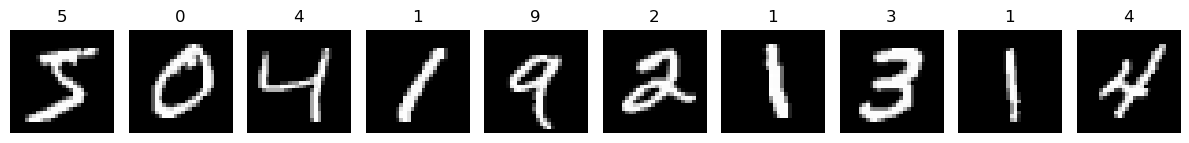

In [56]:
plt.figure(figsize=(12,2))
for i in range(10):
    plt.subplot(1,10, i+1)
    # use the preprocessed image array and labels already defined in the notebook
    plt.imshow(X_train_img[i], cmap='gray', interpolation='nearest')
    plt.axis('off')
    plt.title(str(y_train[i]))
plt.tight_layout()
plt.show()

In [28]:
# Do not use sklearn.linear_model.Perceptron with Keras layers.
# The model is defined using Keras Sequential below (cell 14).
# Keep this cell empty or use it for notes.

#### 1- Using Perceptron

In [29]:
perceptron = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(10, activation='softmax')
])

In [30]:
perceptron.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=["accuracy"])

In [31]:
history_percep = perceptron.fit(
    X_train_img,
    y_train_cat,
    epochs=5,
    batch_size=32,
    validation_data=(X_test_img, y_test_cat),
    verbose=1
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8152 - loss: 0.7773 - val_accuracy: 0.8804 - val_loss: 0.4798
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8804 - loss: 0.4565 - val_accuracy: 0.8962 - val_loss: 0.3993
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8909 - loss: 0.4036 - val_accuracy: 0.9020 - val_loss: 0.3672
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8969 - loss: 0.3771 - val_accuracy: 0.9053 - val_loss: 0.3478
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9003 - loss: 0.3603 - val_accuracy: 0.9074 - val_loss: 0.3352


In [32]:
acc_perc = perceptron.evaluate(X_test_img, y_test_cat, verbose=0)[1]

In [33]:
acc_perc

0.9074000120162964

#### 2- Using ANN

In [34]:
ann = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [35]:
ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
history_ann = ann.fit(
    X_train_img,
    y_train_cat,
    epochs=5,
    batch_size=32,
    validation_data=(X_test_img, y_test_cat),
    verbose=1
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - accuracy: 0.9300 - loss: 0.2383 - val_accuracy: 0.9595 - val_loss: 0.1389
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9694 - loss: 0.1014 - val_accuracy: 0.9720 - val_loss: 0.0897
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9776 - loss: 0.0705 - val_accuracy: 0.9674 - val_loss: 0.1052
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9828 - loss: 0.0542 - val_accuracy: 0.9749 - val_loss: 0.0841
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9860 - loss: 0.0428 - val_accuracy: 0.9769 - val_loss: 0.0772


In [37]:
acc_ann = ann.evaluate(X_test_img, y_test_cat, verbose=0)[1]

In [38]:
acc_ann

0.9768999814987183

#### 3- Using CNN

In [41]:
X_train_cnn = X_train.values.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.values.reshape(-1, 28, 28, 1)

In [43]:
cnn = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [44]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

In [45]:
history_cnn = cnn.fit(
    X_train_cnn,
    y_train_cat,
    epochs=5,
    batch_size=32,
    validation_data=(X_test_cnn, y_test_cat),
    verbose=1 
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 26ms/step - accuracy: 0.9392 - loss: 0.2045 - val_accuracy: 0.9839 - val_loss: 0.0492
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 16ms/step - accuracy: 0.9785 - loss: 0.0735 - val_accuracy: 0.9891 - val_loss: 0.0309
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9836 - loss: 0.0533 - val_accuracy: 0.9916 - val_loss: 0.0263
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.9870 - loss: 0.0440 - val_accuracy: 0.9916 - val_loss: 0.0272
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9888 - loss: 0.0365 - val_accuracy: 0.9921 - val_loss: 0.0235


In [47]:
acc_cnn = cnn.evaluate(X_test_cnn, y_test_cat, verbose=0)[1]
acc_cnn

0.9921000003814697

In [48]:
def plot_training(history, title):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label = 'Val')
    plt.title(f"{title} Accuracy")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label = 'Train')
    plt.plot(history.history['val_loss'], label = 'Val')
    plt.title(f"{title} Loss")
    plt.legend()
    plt.show()

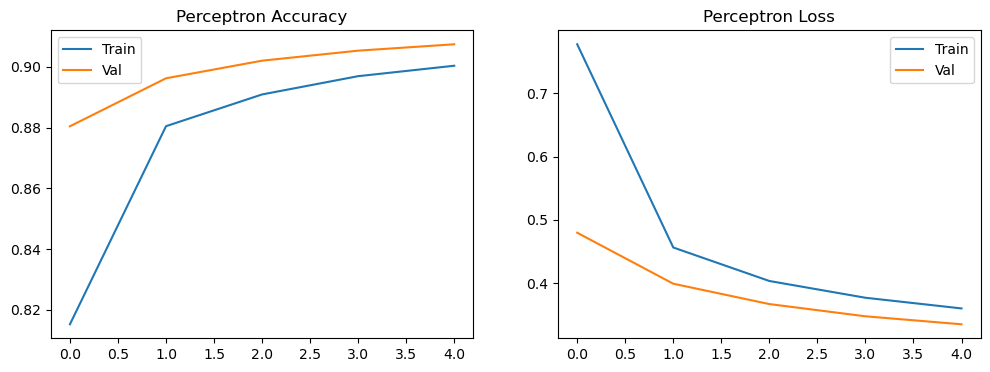

In [49]:
plot_training(history_percep, "Perceptron")

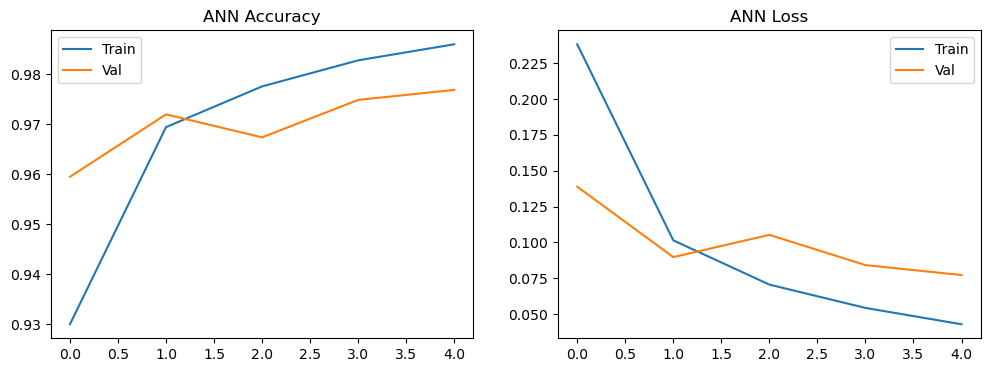

In [50]:
plot_training(history_ann, "ANN")

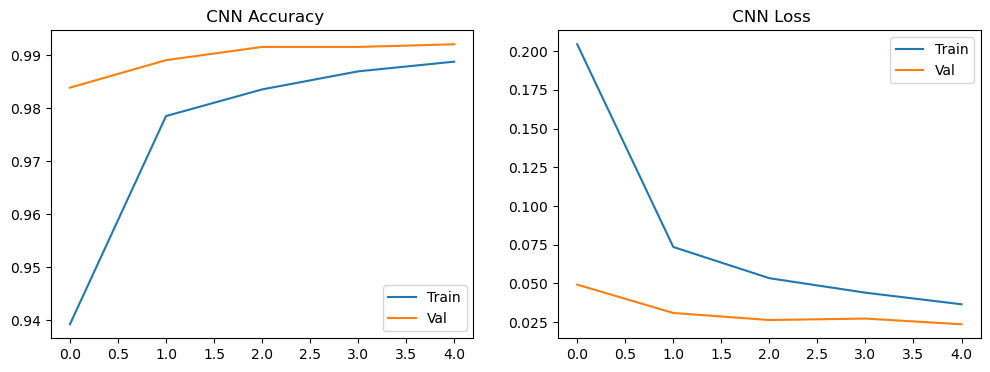

In [51]:
plot_training(history_cnn, " CNN")

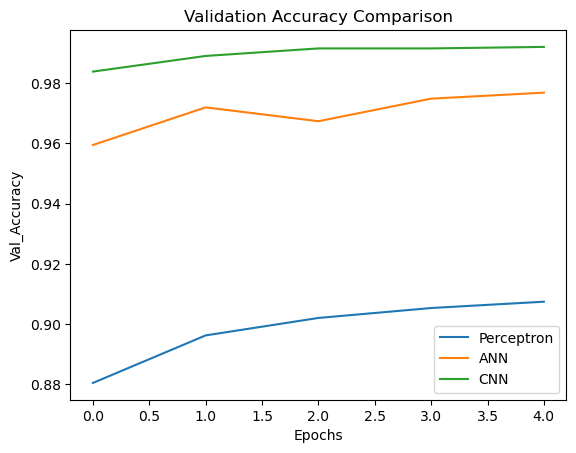

In [52]:
plt.Figure(figsize=(10,6))
plt.plot(history_percep.history['val_accuracy'], label = 'Perceptron')
plt.plot(history_ann.history['val_accuracy'], label = "ANN")
plt.plot(history_cnn.history['val_accuracy'], label = 'CNN')
plt.title("Validation Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Val_Accuracy")
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


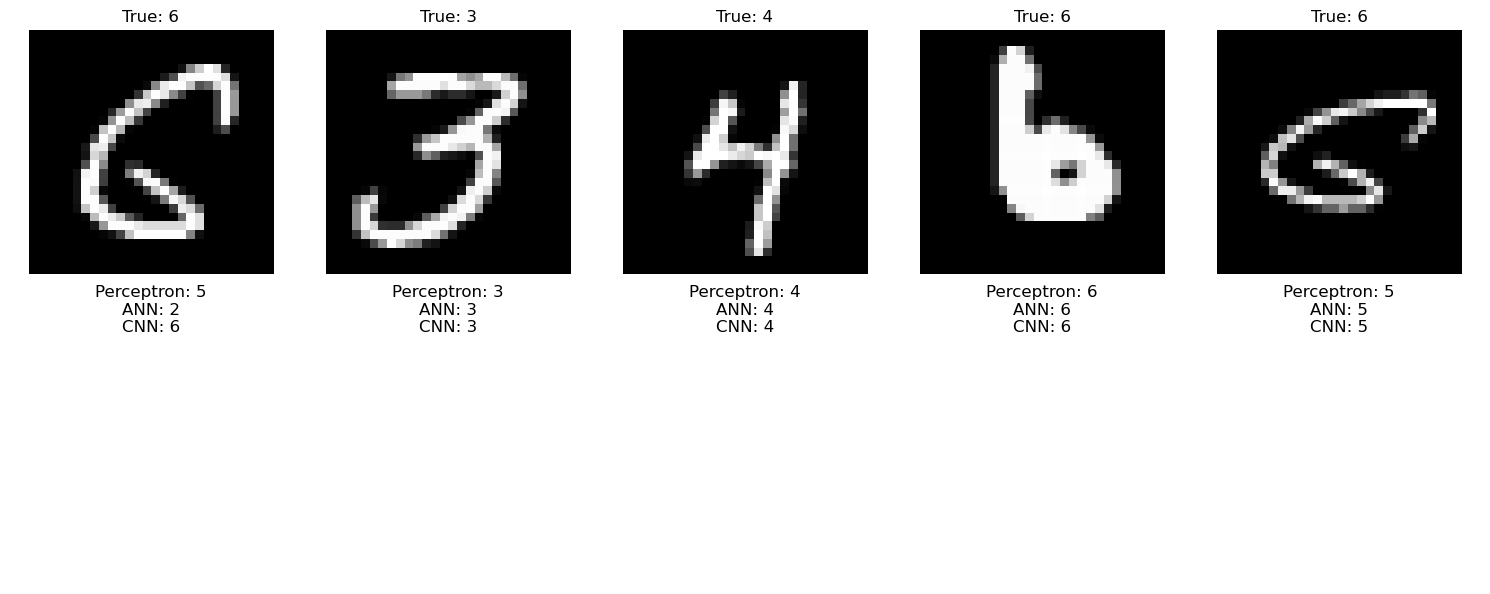

In [69]:
def show_side_by_side(models, model_names, X, X_cnn, y_true, n=5):
    idxs = np.random.choice(len(X), n, replace=False)
    plt.figure(figsize=(15, 6))
    for i, idx in enumerate(idxs):
        plt.subplot(2, n, i+1)
        plt.imshow(X[idx].reshape(28, 28), cmap="gray")
        plt.axis("off")
        plt.title(f"True: {y_true[idx]}")
        preds = [np.argmax(model.predict(X_cnn[idx].reshape(1, 28, 28, 1) if name == "CNN" else X[idx].reshape(1, 28, 28)))
                 for model, name in zip(models, model_names)]
        plt.subplot(2, n, n+i+1)
        plt.axis("off")
        plt.title("\n".join(f"{n}: {p}" for n, p in zip(model_names, preds)))
    plt.tight_layout()
    plt.show()

show_side_by_side([perceptron, ann, cnn], ["Perceptron", "ANN", "CNN"], X_test_img, X_test_cnn, y_test, 5)


#### Accuracy Comparison

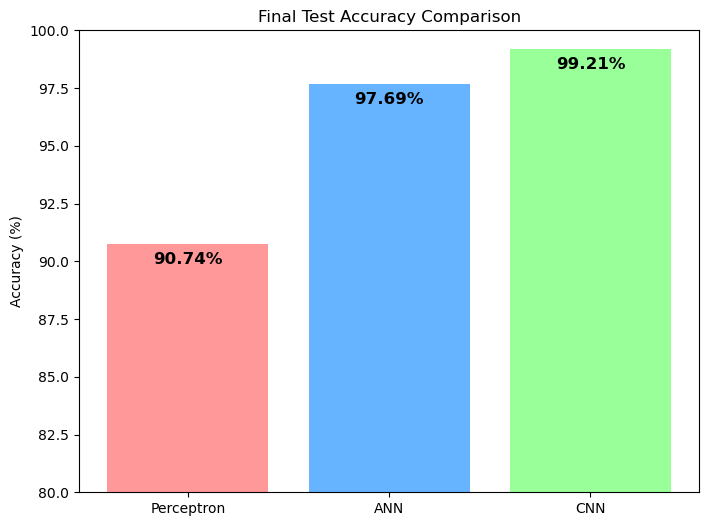

In [71]:
final_accs = [acc_perc*100, acc_ann*100, acc_cnn*100]
models = ["Perceptron", "ANN", "CNN"]

plt.figure(figsize=(8,6))
bars = plt.bar(models, final_accs, color=['#ff9999','#66b3ff','#99ff99'])
plt.title("Final Test Accuracy Comparison")
plt.ylabel("Accuracy (%)")
for bar, acc in zip(bars, final_accs):
    plt.text(bar.get_x()+bar.get_width()/2, bar.get_height()-1, f"{acc:.2f}%",
             ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.ylim(80, 100)
plt.show()